In [1]:
import pandas as pd

In [2]:
df20 = pd.read_csv("data/2020_comptage-velo-donnees-compteurs-3.csv", on_bad_lines='skip')
df20.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques
100003096-353242251;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;12.0;2020-01-01T01:00:00+01:00;2012-02-22;https://www.eco-visio.net/Photos/100003096/15765766519670.jpg;48.83511,2.33338
100003096-353242251;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;11.0;2020-01-01T03:00:00+01:00;2012-02-22;https://www.eco-visio.net/Photos/100003096/15765766519670.jpg;48.83511,2.33338
100003096-353242251;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;6.0;2020-01-01T00:00:00+01:00;2012-02-22;https://www.eco-visio.net/Photos/100003096/15765766519670.jpg;48.83511,2.33338
100003096-353242251;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;9.0;2020-01-01T02:00:00+01:00;2012-02-22;https://www.eco-visio.net/Photos/100003096/15765766519670.jpg;48.83511,2.33338
100003096-353242251;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;6.0;2020-01-01T05:00:00+01:00;2012-02-22;https://www.eco-visio.net/Photos/100003096/15765766519670.jpg;48.83511,2.33338


In [3]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df20 = pd.read_csv('data/2020_comptage-velo-donnees-compteurs-3.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df20.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,97 avenue Denfert Rochereau,12.0,2020-01-01T01:00:00+01:00,"48.83511,2.33338"
1,97 avenue Denfert Rochereau,11.0,2020-01-01T03:00:00+01:00,"48.83511,2.33338"
2,97 avenue Denfert Rochereau,6.0,2020-01-01T00:00:00+01:00,"48.83511,2.33338"
3,97 avenue Denfert Rochereau,9.0,2020-01-01T02:00:00+01:00,"48.83511,2.33338"
4,97 avenue Denfert Rochereau,6.0,2020-01-01T05:00:00+01:00,"48.83511,2.33338"


In [4]:
df20.shape

(784339, 4)

In [5]:
# Séparer latitude et longitude
df20[['latitude', 'longitude']] = df20['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df20["Date et heure de comptage"] = pd.to_datetime(
    df20["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [6]:
df20_sortedbyplace = df20.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df20_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
132639,10 avenue de la Grande Armée SE-NO,0.0,2019-12-31 23:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
130711,10 avenue de la Grande Armée SE-NO,11.0,2020-01-01 00:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
130714,10 avenue de la Grande Armée SE-NO,7.0,2020-01-01 01:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
130717,10 avenue de la Grande Armée SE-NO,14.0,2020-01-01 02:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
132642,10 avenue de la Grande Armée SE-NO,16.0,2020-01-01 03:00:00+00:00,"48.874716,2.292439",48.874716,2.292439


In [7]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df20_sites = df20[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df20_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df20_sites

(69, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,97 avenue Denfert Rochereau,"48.83511,2.33338",48.83511,2.33338
8767,105 rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556
17562,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.83521,2.33307
26233,100 rue La Fayette,"48.87746,2.35008",48.87746,2.35008
35056,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
43615,28 boulevard Diderot,"48.846028,2.375429",48.846028,2.375429
60901,39 quai François Mauriac,"48.83436,2.377",48.83436,2.377
78283,18 quai de l'Hôtel de Ville,"48.85372,2.35702",48.85372,2.35702
95812,27 boulevard Diderot E-O,"48.846099,2.375456",48.846099,2.375456
104434,Voie Georges Pompidou,"48.8484,2.27586",48.8484,2.27586


In [8]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df20_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df20_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df20_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,97 avenue Denfert Rochereau,"48.83511,2.33338",48.835110,2.333380,14ème Ardt
8767,105 rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556,10ème Ardt
17562,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.835210,2.333070,14ème Ardt
26233,100 rue La Fayette,"48.87746,2.35008",48.877460,2.350080,10ème Ardt
35056,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
43615,28 boulevard Diderot,"48.846028,2.375429",48.846028,2.375429,12ème Ardt
60901,39 quai François Mauriac,"48.83436,2.377",48.834360,2.377000,13ème Ardt
78283,18 quai de l'Hôtel de Ville,"48.85372,2.35702",48.853720,2.357020,4ème Ardt
95812,27 boulevard Diderot E-O,"48.846099,2.375456",48.846099,2.375456,12ème Ardt
104434,Voie Georges Pompidou,"48.8484,2.27586",48.848400,2.275860,16ème Ardt


In [9]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df20_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
1,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
2,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
3,5ème Ardt,"48.85013,2.35423; 48.851525,2.343298; 48.851131,2.345678",48.85013; 48.851525; 48.851131,2.35423; 2.343298; 2.345678
4,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
5,7ème Ardt,"48.86179,2.32014; 48.86282,2.31061; 48.86284,2.310345; 48.86288,2.31179",48.86179; 48.86282; 48.86284; 48.86288,2.32014; 2.31061; 2.310345; 2.31179
6,8ème Ardt,"48.869873,2.307419; 48.869831,2.307076; 48.86392,2.31988; 48.86378,2.32003; 48.86462,2.31444",48.869873; 48.869831; 48.86392; 48.86378; 48.86462,2.307419; 2.307076; 2.31988; 2.32003; 2.31444
7,10ème Ardt,"48.877667,2.350556; 48.87746,2.35008; 48.877686,2.354471; 48.877726,2.354926",48.877667; 48.87746; 48.877686; 48.877726,2.350556; 2.35008; 2.354471; 2.354926
8,11ème Ardt,"48.86149,2.37376; 48.86155,2.37407; 48.86077,2.37305; 48.860852,2.372279",48.86149; 48.86155; 48.86077; 48.860852,2.37376; 2.37407; 2.37305; 2.372279
9,12ème Ardt,"48.843435,2.383378; 48.846028,2.375429; 48.846099,2.375456; 48.829523,2.38699; 48.830331,2.400551; 48.83848,2.37587",48.843435; 48.846028; 48.846099; 48.829523; 48.830331; 48.83848,2.383378; 2.375429; 2.375456; 2.38699; 2.400551; 2.37587


In [10]:
df20.shape

(784339, 6)

In [12]:
df20["Date et heure de comptage"] = pd.to_datetime(df20["Date et heure de comptage"], utc=True)
df20["Date et heure de comptage"] = df20["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df20["Date et heure de comptage"].min()
date_max = df20["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2020-01-01 00:00:00+01:00
Date la plus récente : 2020-12-31 23:00:00+01:00


In [13]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2020
mois = [f"2020-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df20_final)
for arr, df_arr in df20_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df20_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df20_temp_mensuel["arr_num"] = (
    df20_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df20_temp_mensuel = (
    df20_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2020_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df20_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df20_temp_mensuel)


✅ Data sauvegardée dans data/2020_temperature_mensuelle_moyenne_par_arrondissement.csv
   arrondissement   2020-01   2020-02   2020-03    2020-04    2020-05  \
0       2ème Ardt  2.447849  3.985920  4.056452  11.256667  13.068952   
1       3ème Ardt  2.492204  4.031178  4.102823  11.305139  13.118011   
2       4ème Ardt  2.582392  4.040302  4.163374  11.430208  13.200941   
3       5ème Ardt  2.574776  4.033716  4.155152  11.424769  13.195251   
4       6ème Ardt  2.341801  3.800575  3.924328  11.190139  12.952554   
5       7ème Ardt  2.604435  4.144720  4.211593  11.417118  13.233669   
6       8ème Ardt  2.542124  4.080402  4.150323  11.354389  13.169167   
7      10ème Ardt  2.369590  3.906250  3.977890  11.176076  12.988676   
8      11ème Ardt  2.293515  3.892780  3.943817  11.273542  13.061022   
9      12ème Ardt  2.380376  3.976341  4.071013  11.430579  13.176523   
10     13ème Ardt  2.440114  3.976229  4.083318  11.402022  13.157616   
11     14ème Ardt  2.361324  3.818247

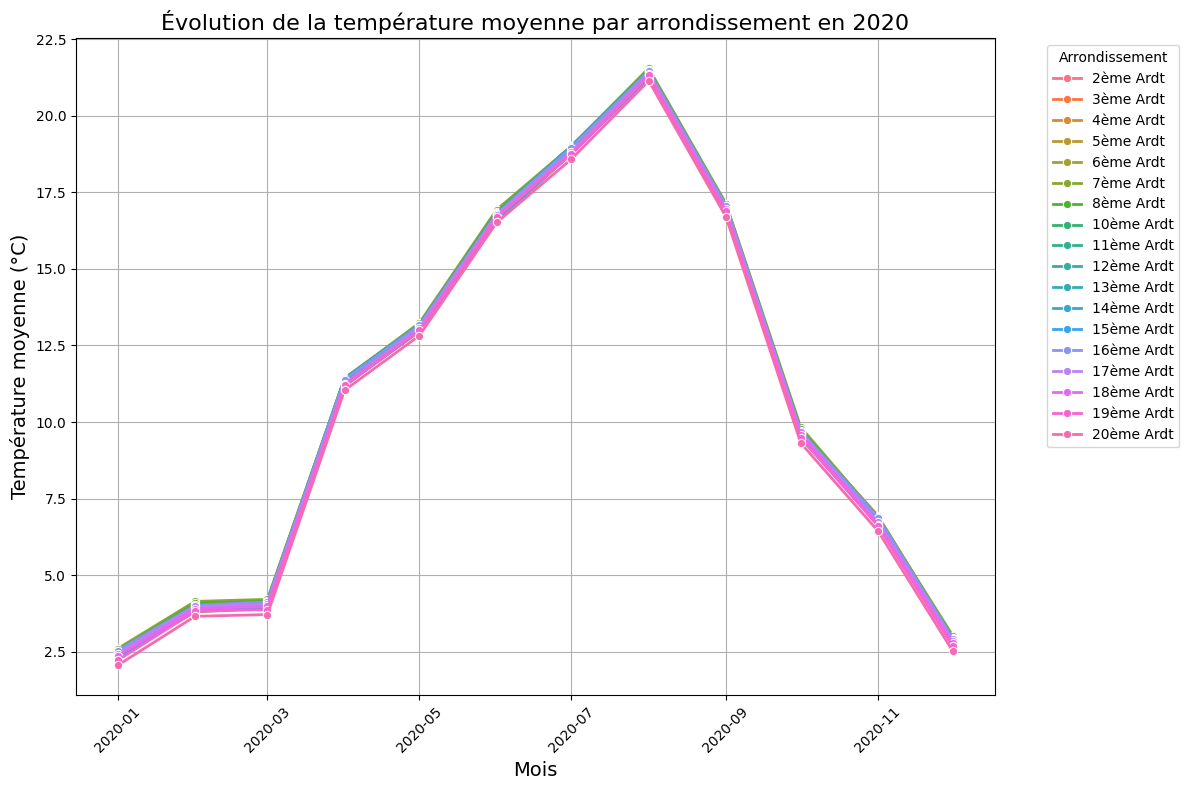

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2020_temperature_mensuelle_moyenne_par_arrondissement.csv"
df20_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df20_long = df20_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df20_long["mois"] = pd.to_datetime(df20_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df20_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2020', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [15]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2020
mois = [f"2020-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df20_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df20_precip_mensuel = pd.DataFrame(results_precip)
df20_precip_mensuel["arr_num"] = df20_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df20_precip_mensuel = df20_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2020_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df20_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df20_precip_mensuel)  # ou df20_precip_mensuel selon nom variable


✅ Data sauvegardée dans data/2020_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  \
11      2ème Ardt     31.8    112.1     70.1     26.9     30.4     48.1   
12      3ème Ardt     31.8    112.1     70.1     26.9     30.4     48.1   
13      4ème Ardt     58.8    207.4    135.4     60.8     74.6     89.2   
14      5ème Ardt     88.2    311.1    203.1     91.2    111.9    133.8   
15      6ème Ardt     29.4    103.7     67.7     30.4     37.3     44.6   
16      7ème Ardt    127.2    448.4    280.4    107.6    121.6    192.4   
17      8ème Ardt    159.0    560.5    350.5    134.5    152.0    240.5   
0      10ème Ardt    127.2    448.4    280.4    107.6    121.6    192.4   
1      11ème Ardt    143.2    454.0    287.2    118.4    129.6    193.2   
2      12ème Ardt    187.2    690.6    405.6    174.6    220.2    270.6   
3      13ème Ardt    273.6    990.3    608.8    267.1    332.7    403.9   
4      1

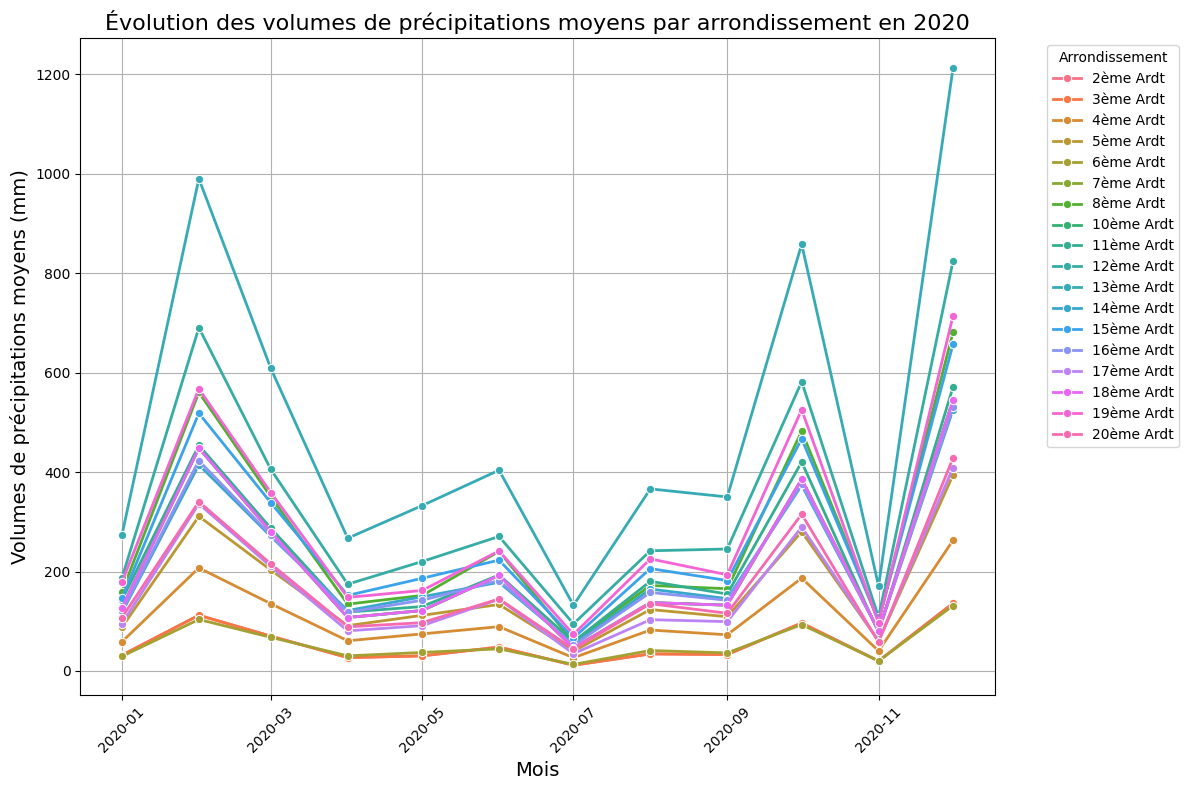

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2020_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df20_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df20_long = df20_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df20_long["mois"] = pd.to_datetime(df20_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df20_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2020', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2020
mois = [f"2020-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df20_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df20_cloud_mensuel = pd.DataFrame(results_cloud)
df20_cloud_mensuel["arr_num"] = df20_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df20_cloud_mensuel = df20_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2020_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df20_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df20_cloud_mensuel)


✅ Data sauvegardée dans data/2020_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2020-01    2020-02    2020-03    2020-04    2020-05  \
11      2ème Ardt  66.038978  73.079023  56.633065  41.054167  54.815860   
12      3ème Ardt  66.038978  73.079023  56.633065  41.054167  54.815860   
13      4ème Ardt  65.551075  73.155172  56.633065  40.986111  55.305108   
14      5ème Ardt  65.551075  73.155172  56.633065  40.986111  55.305108   
15      6ème Ardt  65.551075  73.155172  56.633065  40.986111  55.305108   
16      7ème Ardt  66.038978  73.079023  56.633065  41.054167  54.815860   
17      8ème Ardt  66.038978  73.079023  56.633065  41.054167  54.815860   
0      10ème Ardt  66.038978  73.079023  56.633065  41.054167  54.815860   
1      11ème Ardt  65.456989  73.617816  56.602151  40.783333  54.655914   
2      12ème Ardt  65.116935  73.673851  56.366935  41.052778  54.435484   
3      13ème Ardt  65.309886  73.443327  56.485215  41.023148  54.821983   
4     

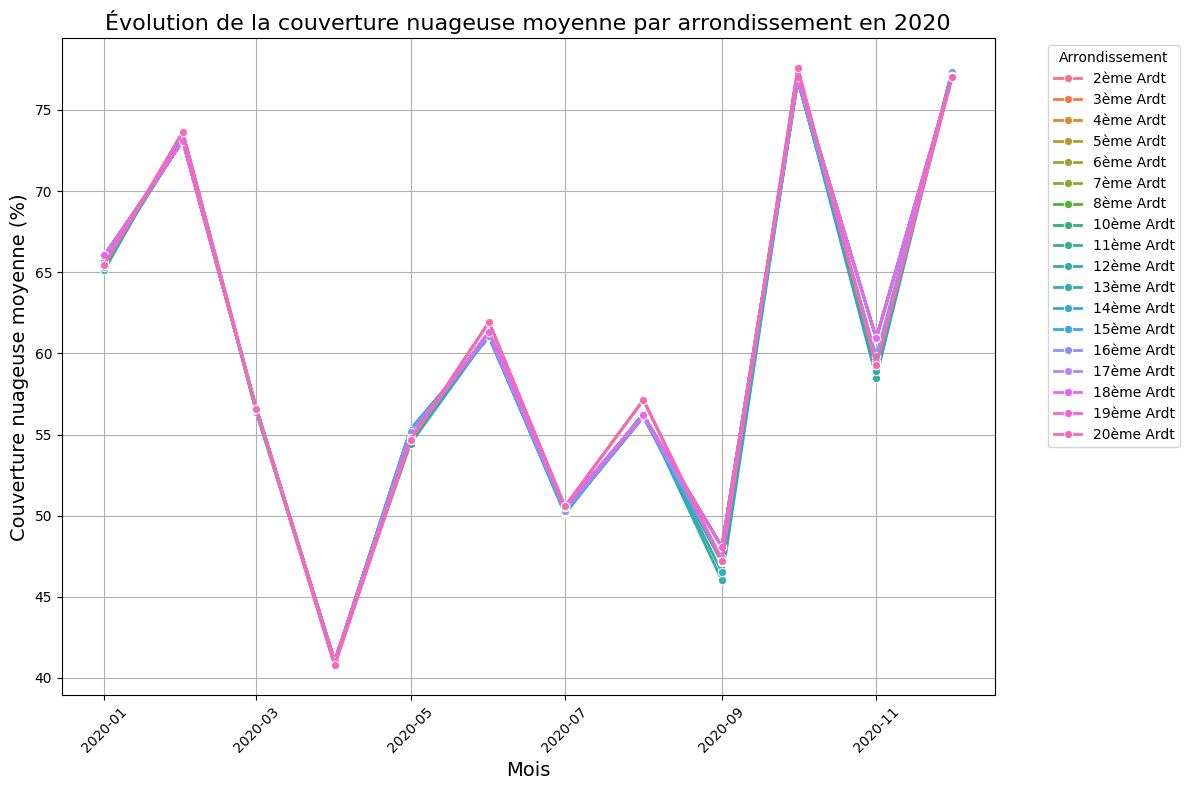

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2020_cloudcover_mensuel_moyen_par_arrondissement.csv"
df20_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df20_long = df20_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df20_long["mois"] = pd.to_datetime(df20_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df20_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2020', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
